(Uebung_Reproduzierbarkeit)=
# 🚀 Übung: Reproduzierbarkeit Nationaler Bildungsbericht

In dem vorangegangenen Kapitel wurden Sie  mit ersten Grundbausteinen im Arbeiten mit **R** vertraut gemacht.  Diese Fähigkeiten können Sie nutzen, um die *Reproduzierbarkeit* von Grafiken, Daten, etc. zu überprüfen.

```{admonition} Doch was genau ist eigentlich Reproduzierbarkeit?
:class: keypoint
Der Begriff Reproduzierbarkeit umschreibt in der Wissenschaft die Möglichkeit, durch Verwenden der gleichen Ausgangsdaten und Auswertungsmethoden die gleichen Ergebnisse zu erhalten {cite}`noauthor_reproducibility_2019`. Dadurch können diese validiert werden, um sicherzustellen, dass sie nicht durch Zufall oder falsche Annahmen entstanden sind. Reproduzierbarkeit erfordert das Offenlegen von Forschungsdaten und -techniken.
```

## Fallbeispiel: Bildungsbericht 

Im nationalen [Bildungsbericht 2022](https://www.bildungsbericht.de/de/bildungsberichte-seit-2006/bildungsbericht-2022)
befindet sich auf der Seite 259 folgende Abbildung:

```{figure} _images/Abb_H1-3.png
---
name: fig-wissenschaftliches-personal-kreisdiagramme
alt: Kreisdiagramme, die die Verteilung von wissenschaftlichem und künstlerischem Personal an Hochschulen zeigen.
---
Die Abb.H1-3 aus dem Nationalen Bildungsbericht 2022.
```

Werfen wir einen Blick auf das erste Kreisdiagramm links oben *"Hochschulen insgesamt"* und *"Personen"*. Wir wollen dieses Diagramm als Ergebnis der Auswertung eines Datensatzen reproduzieren. Dafür analysieren wir die Daten aus der Primärquelle.

```{admonition} Achtung!
:class: caution
Der Bildungsbericht verweist auf einzelne Excel-Dateien als Datenbasis (Hier: "Tab. H1-9web"), die der Veröffentlichung des Berichts beigefügt sind. Wir wollen aber einen Schritt weiter gehen und prüfen, ob das Ergebnis auch aus der Primärquelle nachvollzogen werden kann. 
```

### Primärquelle finden 

Unter der Grafik sind als Quelle unter anderem die "Statistische[n] Ämter des Bundes und der Länder" angegeben. 
Wie Sie vermutlich erkannt haben, handelt es sich bei der nun von uns benötigten Datei um die CSV-Ausgangsdatei aus dem vorangegangenen Kapitel (s. [6.2 Übung: Arbeiten mit CSV-Dateien in R](/Markdown/6_2_Übung_Arbeiten_CSV_in_R.ipynb)). 

### Nachbauen des Kreisdiagramms in R
Das nachfolgende Skript knüpft an die vorangegangene Übung an. Es wird vorausgesetzt, dass die Daten entsprechend des Skriptes angepasst wurden.
Ihre Tabellendaten sollten wie folgt aussehen:

````{admonition} in 6.2 und 6.3 bereits ausgeführter Code: 
:class: hinweis, dropdown
```
#TidyVerse Package Installation
install.packages("tidyverse")
library(tidyverse)

#Daten einlesen
local_path <- "Data/21341-0001_F_2020.csv"
url_path <- "https://raw.githubusercontent.com/quadriga-dk/Tabelle-Fallstudie-1/main/Markdown/Data/21341-0001_F_2020.csv"

if (file.exists(local_path)) {
  data_csv_clean <- read.csv2(local_path, header = FALSE, encoding = "latin1")
} else {
  data_csv_clean <- read.csv2(url_path, header = FALSE, encoding = "latin1")
}

#Ergebnisse ansehen
head(data_csv_clean)

#Umlaute entfernen
data_csv_clean$V1 <- str_replace_all(data_csv_clean$V1, c("ä" = "ae", "ö" = "oe", "ü" ="ue", "ß" ="ss"))
data_csv_clean$V2 <- str_replace_all(data_csv_clean$V2, c("ä" = "ae", "ö" = "oe", "ü" ="ue", "ß" ="ss"))

#Ausgewählte Ergebnisse ansehen
show(data_csv_clean[8:20,1:3])

#Tabelle unterteilen
Metadaten <- data_csv_clean[c(1:6, 87:88), 1]
Tabellendaten <- data_csv_clean[8:85, 1:3]

#Spaltenüberschriften setzen
colnames(Tabellendaten) <- c("Angestelltenverhaeltnis", "Geschlecht", "Angestelltenzahl_2020")

#Nummerierung neu setzen
row.names(Tabellendaten) <- 1:78

#Ergebnis ansehen
head(Tabellendaten) 

#Variablenklassen bestimmen
class(Tabellendaten$Angestelltenverhaeltnis) #sollte als character oder factor gelesen werden
class(Tabellendaten$Geschlecht) #sollte als character oder factor gelesen werden
class(Tabellendaten$Angestelltenzahl_2020) #sollte als numerisch oder integer gelesen werden

#Variablenklassen ändern
Tabellendaten$Angestelltenzahl_2020 <- as.integer(Tabellendaten$Angestelltenzahl_2020)

#Maximalwert anzeigen lassen
max(Tabellendaten$Angestelltenzahl_2020, na.rm = TRUE)

#Variablen sichten
unique(Tabellendaten$Angestelltenverhaeltnis)

#Neue Variablen erstellen
#1.Ebene: Neue Variable "Personalkategorie"
Tabellendaten$Personalkategorie <- c(NA)
#2.Ebene: Neue Variable "Art der Anstellung"
Tabellendaten$Art_der_Anstellung <- c(NA)

#Einpflegen des Variableninhalts
#1.Ebene
Tabellendaten$Personalkategorie[76:78] <- "Insgesamt"
Tabellendaten$Personalkategorie[1:30] <- "Wissenschaftliches und künstlerisches Personal"
Tabellendaten$Personalkategorie[31:75] <- "Verwaltungs-, technisches und sonstiges Personal"
#2.Ebene
Tabellendaten$Art_der_Anstellung[c(1:3, 31:33, 76:78)] <- "Insgesamt"
Tabellendaten$Art_der_Anstellung[c(4:18,34:66)] <- "Hauptberuflich"
Tabellendaten$Art_der_Anstellung[c(19:30,67:75)] <- "Nebenberuflich"

#Unterkategorisieren
#Geschlecht
Tabelle_maennlich <- subset(Tabellendaten, Geschlecht == "maennlich")
Tabelle_weiblich <- subset(Tabellendaten, Geschlecht == "weiblich")
Tabelle_Insgesamt <- subset(Tabellendaten, Geschlecht == "Insgesamt")

#Redundante Tabelle entfernen
Tabelle_Insgesamt <- subset(Tabelle_Insgesamt, select= c(-Geschlecht))

#Tabellendaten filtern
#Nach Angestelltenzahl unter 5000 filtern
filter(Tabelle_Insgesamt, Tabelle_Insgesamt$Angestelltenzahl_2020 <= 5000)
#Nach weiblichen Wiss.& Künstl.Personal filtern
filter(Tabellendaten, Tabellendaten$Personalkategorie == "Wissenschaftliches und künstlerisches Personal" & Tabellendaten$Geschlecht == "weiblich" )
#Filtern nach niedrigstem Wert
filter(Tabellendaten, Tabellendaten$Angestelltenzahl_2020 == min(Tabellendaten$Angestelltenzahl_2020, na.rm = TRUE))

#Fehlerbehebung Leerzeichen entfernen
Tabellendaten$Angestelltenverhaeltnis <- trimws(Tabellendaten$Angestelltenverhaeltnis)

#Filter nach 'Professoren'
filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Professoren")

#Sortieren von Tabellendaten
Tabelle_Insgesamt_Sortiert <- Tabelle_Insgesamt[order(Tabelle_Insgesamt$Angestelltenzahl_2020, decreasing = TRUE),]

#Ergebnis ansehen
head(Tabelle_Insgesamt_Sortiert)
```
````

In [ ]:
#TidyVerse Package Installation
install.packages("tidyverse")
library(tidyverse)

#Daten einlesen
local_path <- "Data/21341-0001_F_2020.csv"
url_path <- "https://raw.githubusercontent.com/quadriga-dk/Tabelle-Fallstudie-1/main/Markdown/Data/21341-0001_F_2020.csv"

if (file.exists(local_path)) {
  data_csv_clean <- read.csv2(local_path, header = FALSE, encoding = "latin1")
} else {
  data_csv_clean <- read.csv2(url_path, header = FALSE, encoding = "latin1")
}

#Umlaute entfernen
data_csv_clean$V1 <- str_replace_all(data_csv_clean$V1, c("ä" = "ae", "ö" = "oe", "ü" ="ue", "ß" ="ss"))
data_csv_clean$V2 <- str_replace_all(data_csv_clean$V2, c("ä" = "ae", "ö" = "oe", "ü" ="ue", "ß" ="ss"))

#Tabelle unterteilen
Metadaten <- data_csv_clean[c(1:6, 87:88), 1]
Tabellendaten <- data_csv_clean[8:85, 1:3]

#Spaltenüberschriften setzen
colnames(Tabellendaten) <- c("Angestelltenverhaeltnis", "Geschlecht", "Angestelltenzahl_2020")

#Nummerierung neu setzen
row.names(Tabellendaten) <- 1:78

#Variablenklassen ändern
Tabellendaten$Angestelltenzahl_2020 <- as.integer(Tabellendaten$Angestelltenzahl_2020)

#Maximalwert anzeigen lassen
max(Tabellendaten$Angestelltenzahl_2020, na.rm = TRUE)

#Variablen sichten
unique(Tabellendaten$Angestelltenverhaeltnis)

#Neue Variablen erstellen
#1.Ebene: Neue Variable "Personalkategorie"
Tabellendaten$Personalkategorie <- c(NA)
#2.Ebene: Neue Variable "Art der Anstellung"
Tabellendaten$Art_der_Anstellung <- c(NA)

#Einpflegen des Variableninhalts
#1.Ebene
Tabellendaten$Personalkategorie[76:78] <- "Insgesamt"
Tabellendaten$Personalkategorie[1:30] <- "Wissenschaftliches und künstlerisches Personal"
Tabellendaten$Personalkategorie[31:75] <- "Verwaltungs-, technisches und sonstiges Personal"
#2.Ebene
Tabellendaten$Art_der_Anstellung[c(1:3, 31:33, 76:78)] <- "Insgesamt"
Tabellendaten$Art_der_Anstellung[c(4:18,34:66)] <- "Hauptberuflich"
Tabellendaten$Art_der_Anstellung[c(19:30,67:75)] <- "Nebenberuflich"

#Unterkategorisieren
#Geschlecht
Tabelle_maennlich <- subset(Tabellendaten, Geschlecht == "maennlich")
Tabelle_weiblich <- subset(Tabellendaten, Geschlecht == "weiblich")
Tabelle_Insgesamt <- subset(Tabellendaten, Geschlecht == "Insgesamt")

#Redundante Tabelle entfernen
Tabelle_Insgesamt <- subset(Tabelle_Insgesamt, select= c(-Geschlecht))

#Tabellendaten filtern
#Nach Angestelltenzahl unter 5000 filtern
filter(Tabelle_Insgesamt, Tabelle_Insgesamt$Angestelltenzahl_2020 <= 5000)
#Nach weiblichen Wiss.& Künstl.Personal filtern
filter(Tabellendaten, Tabellendaten$Personalkategorie == "Wissenschaftliches und künstlerisches Personal" & Tabellendaten$Geschlecht == "weiblich" )
#Filtern nach niedrigstem Wert
filter(Tabellendaten, Tabellendaten$Angestelltenzahl_2020 == min(Tabellendaten$Angestelltenzahl_2020, na.rm = TRUE))

#Fehlerbehebung Leerzeichen entfernen
Tabellendaten$Angestelltenverhaeltnis <- trimws(Tabellendaten$Angestelltenverhaeltnis)

#Filter nach 'Professoren'
filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Professoren")

#Sortieren von Tabellendaten
Tabelle_Insgesamt_Sortiert <- Tabelle_Insgesamt[order(Tabelle_Insgesamt$Angestelltenzahl_2020, decreasing = TRUE),]

Warning message in install.packages("tidyverse"):
"'lib = "C:/Program Files/R/R-4.4.2/library"' is not writable"


ERROR: Error in install.packages("tidyverse"): unable to install packages


In [ ]:
head(Tabellendaten)

,Angestelltenverhaeltnis,Geschlecht,Angestelltenzahl_2020,Personalkategorie,Art_der_Anstellung
,<chr>,<chr>,<int>,<chr>,<chr>
1,Wissenschaftliches und kuenstlerisches Personal,maennlich,247720,Wissenschaftliches und künstlerisches Personal,Insgesamt
2,Wissenschaftliches und kuenstlerisches Personal,weiblich,167112,Wissenschaftliches und künstlerisches Personal,Insgesamt
3,Wissenschaftliches und kuenstlerisches Personal,Insgesamt,414832,Wissenschaftliches und künstlerisches Personal,Insgesamt
4,Hauptberufl. wissenschaftl. u. kuenstler. Personal,maennlich,159567,Wissenschaftliches und künstlerisches Personal,Hauptberuflich
5,Hauptberufl. wissenschaftl. u. kuenstler. Personal,weiblich,109708,Wissenschaftliches und künstlerisches Personal,Hauptberuflich
6,Hauptberufl. wissenschaftl. u. kuenstler. Personal,Insgesamt,269275,Wissenschaftliches und künstlerisches Personal,Hauptberuflich


#### Aufbau des Kreisdiagramms 

```{figure} _images/Abb_H1-3_fokus.png
---
name: fig-wissenschaftliches-personal-fokus
alt: Abbildung von Kreisdiagrammen mit Hervorhebung des Diagramms zu Personal an Hochschulen insgesamt.
---
Das zu reproduzierende Kreisdiagramm aus dem Bildungsbericht 2022.
```

Um das Kreisdiagramm reproduzieren zu können, müssen Sie zunächst die einzelnen Bestandteile verstehen.
Das Diagramm unterteilt in die folgenden drei Personalgruppen: 

- Professor:innen
- Wissenschaftliche und künstlerische Mitarbeiter:innen 
- Nebenberufliche Mitarbeiter:innen

Zu diesen Personalgruppen werden jeweils die absoluten Beschäftigungszahlen und der jeweilige prozentuale Anteil zur Gesamtsumme für das Jahr 2020 
angegeben.

*Lesebeispiel: Im Jahr 2020 waren insgesamt 49.293 Professor:innen an Universitäten und Fachhochschulen in Deutschland angestellt.*


#### Einzelne Datenwerte finden
Zur eigenständigen Erstellung des Kreisdiagramms müssen Sie nun die absoluten Beschäftigungszahlen in Ihren Tabellendaten finden. 
Hierzu bietet sich das Suchen mittels der `filter()`-Funktion an, welche zum Ende der letzten Übung thematisiert wurde.

Filtern nach Professoren: 

In [ ]:
filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Professoren" & Tabellendaten$Geschlecht == "Insgesamt")

Angestelltenverhaeltnis,Geschlecht,Angestelltenzahl_2020,Personalkategorie,Art_der_Anstellung
<chr>,<chr>,<int>,<chr>,<chr>
Professoren,Insgesamt,49293,Wissenschaftliches und künstlerisches Personal,Hauptberuflich


Wie Sie erkennen können, stimmt die Angestelltenzahl von 49293 mit der aus dem Kreisdiagramm überein.
Diese Ausgabe können Sie sich nun abspeichern.

In [ ]:
Professoren_Insgesamt <- filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Professoren" & Tabellendaten$Geschlecht == "Insgesamt")

Für Nebenberufliche Mitarbeiter:innen gehen Sie analog vor:

In [ ]:
Nebenberuflich_Insgesamt <- filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Nebenberufl. wissenschaftl. u. kuenstler. Personal" & Tabellendaten$Geschlecht == "Insgesamt")
Nebenberuflich_Insgesamt

Angestelltenverhaeltnis,Geschlecht,Angestelltenzahl_2020,Personalkategorie,Art_der_Anstellung
<chr>,<chr>,<int>,<chr>,<chr>
Nebenberufl. wissenschaftl. u. kuenstler. Personal,Insgesamt,145557,Wissenschaftliches und künstlerisches Personal,Nebenberuflich


Den Wert für "wissenschaftlichen und künstlerischen Mitarbeiter:innen" im Kreisdiagramm können Sie nicht direkt aus der Tabelle ablesen.
Sie erhalten diese Zahl indem Sie die "Professoren - Insgesamt" von "Hauptberuflich wissenschaftliches und künstlerisches Personal - Insgesamt" abziehen, da die Professoren in der DESTATIS-Datei auch unter der Kategorie "Hauptberuflich wissenschaftliches und künstlerisches Personal" gelistet werden.

In [ ]:
Hauptberuflich_Insgesamt <- filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Hauptberufl. wissenschaftl. u. kuenstler. Personal" & Tabellendaten$Geschlecht == "Insgesamt")
Hauptberuflich_Insgesamt

Angestelltenverhaeltnis,Geschlecht,Angestelltenzahl_2020,Personalkategorie,Art_der_Anstellung
<chr>,<chr>,<int>,<chr>,<chr>
Hauptberufl. wissenschaftl. u. kuenstler. Personal,Insgesamt,269275,Wissenschaftliches und künstlerisches Personal,Hauptberuflich


In [ ]:
Hauptberuflich_exlusive_Professoren <- Hauptberuflich_Insgesamt$Angestelltenzahl_2020 - Professoren_Insgesamt$Angestelltenzahl_2020
Hauptberuflich_exlusive_Professoren

[1] 219982

`````{margin}
````{admonition} Hinweis
:class: hinweis
Als Dataframe wird eine Datenstruktur bezeichnet, die aus Spalten (Variablen) und Zeilen (Beobachtungen) besteht und damit einer einfachen, zweidimensionalen Tabelle gleicht. Dataframes finden sich in den programmiersprachen R, aber auch in Python.
```
````
`````

#### Dataframe  erstellen
Sie haben nun die einzelnen Datenwerte abgespeichert. Damit Sie diese für ein Kreisdiagramm verwenden können, müssen Sie diese Werte in einem neu erstellen Dataframe kombinieren.

Hierzu erstellen Sie zunächst einen Vektor mit den passenden Bezeichnungen (Grundlage: Legende der Originalabbildung).

In [ ]:
Personalgruppe <- c("Wissenschaftliche und kuenstlerische Mitarbeiter:innen", "Professor:innen", "Nebenberufliche Mitarbeiter:innen")
Personalgruppe

[1] "Wissenschaftliche und kuenstlerische Mitarbeiter:innen"
[2] "Professor:innen"                                       
[3] "Nebenberufliche Mitarbeiter:innen"

Nun erzeugen Sie einen zweiten Vektor, welcher die abgespeicherten Datenwerte zu den jeweiligen Personalgruppen enthält.

**Achtung!:** Hier ist die richtige Reihenfolge analog zum Vektor "Arbeitsverhältnis" wichtig.

In [ ]:
Absolute_Werte <- c(Hauptberuflich_exlusive_Professoren, Professoren_Insgesamt$Angestelltenzahl_2020, Nebenberuflich_Insgesamt$Angestelltenzahl_2020)
Absolute_Werte

[1] 219982  49293 145557

Nun können Sie beide Vektoren kombinieren und einen Dataframe erstellen:

In [ ]:
Daten_kreisdiagramm <- data.frame(Personalgruppe, Absolute_Werte)
Daten_kreisdiagramm

Personalgruppe,Absolute_Werte
<chr>,<int>
Wissenschaftliche und kuenstlerische Mitarbeiter:innen,219982
Professor:innen,49293
Nebenberufliche Mitarbeiter:innen,145557


Der erstellte Dataframe kann nun um eine neue Variable erweitert werden, welche die Datenwerte in Prozent zum Gesamtwert anzeigt.
Hierfür können Sie sich die folgenden zwei Befehle zu nutze machen:

- Der Befehl `round()`rundet eine Zahl auf die nach dem Komma angegebene Nachkommastelle.
- Der Befehl `paste()` kombiniert zwei einzelne Objekte (z.B. Vektoren, einzelne Datenwerte, etc.). Mittels `sep =` können Sie angeben, welches Zeichen zwischen den Objekten stehen soll. Falls Sie diese Spezifikation weglassen, wird **R** ein einzelnes Leerzeichen verwenden.


In [ ]:
#Varibale "Prozent" erzeugen
Daten_kreisdiagramm$Prozent <- paste(round(Daten_kreisdiagramm$Absolute_Werte/sum(Daten_kreisdiagramm$Absolute_Werte)*100,0), "%")

#Absolute Werte und Prozentwerte kombinieren
Daten_kreisdiagramm$Werte_kombiniert <- paste(Daten_kreisdiagramm$Absolute_Werte, sep = " | ", Daten_kreisdiagramm$Prozent)

#Neue Variablen begutachten
Daten_kreisdiagramm

Personalgruppe,Absolute_Werte,Prozent,Werte_kombiniert
<chr>,<int>,<chr>,<chr>
Wissenschaftliche und kuenstlerische Mitarbeiter:innen,219982,53 %,219982 | 53 %
Professor:innen,49293,12 %,49293 | 12 %
Nebenberufliche Mitarbeiter:innen,145557,35 %,145557 | 35 %


Falls Sie wie in dem originalen Kreisdiagramm Tausenderpunkte angezeigt bekommen möchten, können Sie die Funktion `prettyNum` verwenden.

In [ ]:
Daten_kreisdiagramm$Werte_kombiniert <- prettyNum(Daten_kreisdiagramm$Werte_kombiniert, big.mark = ".", decimal.mark = ",")

#### Visualisierung des Kreisdiagramms
Aus dem erzeugten Dataframe können Sie sich nun ein Kreisdiagramm erstellen lassen. Hierzu könnten Sie den Befehl `pie()` nutzen. Diese Funktion bietet jedoch nicht viele Anpassungsmöglichkeiten und im folgenden wird auf die weit verbreitete `ggplot`-Funktion zurückgegriffen.

Lassen Sie sich nicht von der Länge des folgenden Codes abschrecken. Jede einzelne Zeile spezifiziert den Aufbau des Kreisdiagramms. Wenn Sie weitere Details zu bestimmten Befehlen erfahren wollen, schlagen Sie diese in der R-Dokumentation nach (z.B. `?geom_label()`) oder lassen Sie mal bestimmte Zeilen weg, um nachzugucken, was sich am Output verändert.

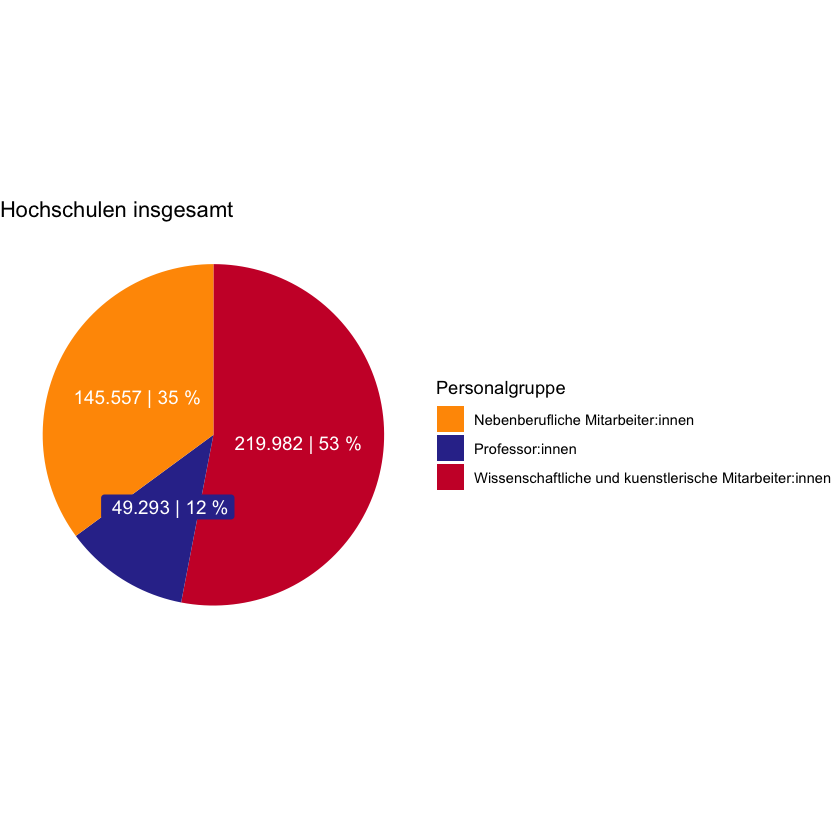

In [ ]:
ggplot(Daten_kreisdiagramm, aes(x="", y=Absolute_Werte, fill=Personalgruppe))+ #Setzen der Datenbasis
  geom_bar(stat="identity")+ #Setzen wie die Werte verarbeitet werden sollen
  coord_polar("y")+ #Zusatz für Kreisdiagramme
  theme_void()+ #Hintergrund wird weiß eingefärbt
  scale_fill_manual(values = c("#FF9900", "#333399", "#CC0033"))+ #Farben für einzelne Diagrammteile setzen. Farbcodes sind online abrufbar.
  ggtitle("Hochschulen insgesamt")+ #Überschrift setzen
  geom_label(aes(label=Werte_kombiniert), #Beschriftung setzen
             position = position_stack(vjust = 0.5), #Position der Beschriftung setzen
             color="white", #Schriftfarbe setzen
             label.size = 0, #Größe des Randes um Beschriftung setzen
             size=4, #Schriftgröße setzen
             show.legend = FALSE) #Beschriftung soll nicht in der Legende angezeigt werden

Voilà, Sie haben soeben das Kreisdiagramm nachgebaut!

#### Fazit 
Betrachten Sie nun das originale Diagramm aus dem Bildungsbericht und das von Ihnen selbstständig erzeugte im Vergleich:

```{figure} _images/Pie_vergleich.png
---
name: diagramme-vergleich
alt: Das mit R nachgebaute Kreisdiagramm und das originale Kreisdiagramm zu Personal an Hochschulen im Vergleich.
---
Vergleich des nachgebauten (links) und des originalen (rechts) Kreisdiagramms.
```

Bis auf kleine Schönheitsfehler fällt im direkten Vergleich kein Unterschied auf.

**Das Kreisdiagramm ist somit mittels der Primärquelle reproduzierbar!**


````{admonition} Zur Kontrolle finden Sie hier den gesamten Code der Übung(en): 
:class: hinweis, dropdown
```
#Benötigtes Package zum Start der Session laden, damit alle hier verwendeteten Befehle verfügbar sind
library(tidyverse) 

#Daten einlesen
local_path <- "Data/21341-0001_F_2020.csv"
url_path <- "https://raw.githubusercontent.com/quadriga-dk/Tabelle-Fallstudie-1/main/Markdown/Data/21341-0001_F_2020.csv"

if (file.exists(local_path)) {
  data_csv_clean <- read.csv2(local_path, header = FALSE, encoding = "latin1")
} else {
  data_csv_clean <- read.csv2(url_path, header = FALSE, encoding = "latin1")
}

#Ergebnisse ansehen
head(data_csv_clean)

#Umlaute entfernen
data_csv_clean$V1 <- str_replace_all(data_csv_clean$V1, c("ä" = "ae", "ö" = "oe", "ü" ="ue", "ß" ="ss"))
data_csv_clean$V2 <- str_replace_all(data_csv_clean$V2, c("ä" = "ae", "ö" = "oe", "ü" ="ue", "ß" ="ss"))

#Ausgewählte Ergebnisse ansehen
show(data_csv_clean[8:20,1:3])

#Tabelle unterteilen
Metadaten <- data_csv_clean[c(1:6, 87:88), 1]
Tabellendaten <- data_csv_clean[8:85, 1:3]

#Spaltenüberschriften setzen
colnames(Tabellendaten) <- c("Angestelltenverhaeltnis", "Geschlecht", "Angestelltenzahl_2020")

#Nummerierung neu setzen
row.names(Tabellendaten) <- 1:78

#Ergebnis ansehen
head(Tabellendaten) 

#Variablenklassen bestimmen
class(Tabellendaten$Angestelltenverhaeltnis) #sollte als character oder factor gelesen werden
class(Tabellendaten$Geschlecht) #sollte als character oder factor gelesen werden
class(Tabellendaten$Angestelltenzahl_2020) #sollte als numerisch oder integer gelesen werden

#Variablenklassen ändern
Tabellendaten$Angestelltenzahl_2020 <- as.integer(Tabellendaten$Angestelltenzahl_2020)

#Maximalwert anzeigen lassen
max(Tabellendaten$Angestelltenzahl_2020, na.rm = TRUE)

#Variablen sichten
unique(Tabellendaten$Angestelltenverhaeltnis)

#Neue Variablen erstellen
#1.Ebene: Neue Variable "Personalkategorie"
Tabellendaten$Personalkategorie <- c(NA)
#2.Ebene: Neue Variable "Art der Anstellung"
Tabellendaten$Art_der_Anstellung <- c(NA)

#Einpflegen des Variableninhalts
#1.Ebene
Tabellendaten$Personalkategorie[76:78] <- "Insgesamt"
Tabellendaten$Personalkategorie[1:30] <- "Wissenschaftliches und künstlerisches Personal"
Tabellendaten$Personalkategorie[31:75] <- "Verwaltungs-, technisches und sonstiges Personal"
#2.Ebene
Tabellendaten$Art_der_Anstellung[c(1:3, 31:33, 76:78)] <- "Insgesamt"
Tabellendaten$Art_der_Anstellung[c(4:18,34:66)] <- "Hauptberuflich"
Tabellendaten$Art_der_Anstellung[c(19:30,67:75)] <- "Nebenberuflich"

#Unterkategorisieren
#Geschlecht
Tabelle_maennlich <- subset(Tabellendaten, Geschlecht == "maennlich")
Tabelle_weiblich <- subset(Tabellendaten, Geschlecht == "weiblich")
Tabelle_Insgesamt <- subset(Tabellendaten, Geschlecht == "Insgesamt")

#Redundante Tabelle entfernen
Tabelle_Insgesamt <- subset(Tabelle_Insgesamt, select= c(-Geschlecht))

#Tabellendaten filtern
#Fehlerbehebung Leerzeichen entfernen
Tabellendaten$Angestelltenverhaeltnis <- trimws(Tabellendaten$Angestelltenverhaeltnis)

#Filter nach 'Professoren'
filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Professoren" & Tabellendaten$Geschlecht == "Insgesamt")

#Abspeichern Professoren
Professoren_Insgesamt <- filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Professoren" & Tabellendaten$Geschlecht == "Insgesamt")

#Abspeichern Nebenberuflich
Nebenberuflich_Insgesamt <- filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Nebenberufl. wissenschaftl. u. kuenstler. Personal" & Tabellendaten$Geschlecht == "Insgesamt")

#Wert anzeigen lassen
Nebenberuflich_Insgesamt

Professoren_Insgesamt <- filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Professoren" &
                                  Tabellendaten$Geschlecht == "Insgesamt")

Hauptberuflich_Insgesamt <- filter(Tabellendaten, Tabellendaten$Angestelltenverhaeltnis == "Hauptberufl. wissenschaftl. u. kuenstler. Personal" &
                                     Tabellendaten$Geschlecht == "Insgesamt")

Hauptberuflich_exlusive_Professoren <- Hauptberuflich_Insgesamt$Angestelltenzahl_2020 - Professoren_Insgesamt$Angestelltenzahl_2020

#Wert anzeigen lassen
Hauptberuflich_exlusive_Professoren

#Vektor ertsellen mit Namen Personalgruppe
Personalgruppe <- c("Wissenschaftliche und kuenstlerische Mitarbeiter:innen", "Professor:innen", "Nebenberufliche Mitarbeiter:innen")

#Zweiter Vektor Datenwerte Personalgruppen 
Absolute_Werte <- c(Hauptberuflich_exlusive_Professoren, Professoren_Insgesamt$Angestelltenzahl_2020, 
                    Nebenberuflich_Insgesamt$Angestelltenzahl_2020)

#Dataframe
Daten_kreisdiagramm <- data.frame(Personalgruppe, Absolute_Werte)

#Dataframe anzeigen lassen
Daten_kreisdiagramm

#Varibale "Prozent" erzeugen 
Daten_kreisdiagramm$Prozent <- paste(round(Daten_kreisdiagramm$Absolute_Werte/sum(Daten_kreisdiagramm$Absolute_Werte)*100,0), "%")

#Absolute Werte und Prozentwerte kombinieren 
Daten_kreisdiagramm$Werte_kombiniert <- paste(Daten_kreisdiagramm$Absolute_Werte, sep = " | ", Daten_kreisdiagramm$Prozent)

#Neue Variablen begutachten
Daten_kreisdiagramm

#Tausenderpunkte im Kreisdiagramm
Daten_kreisdiagramm$Werte_kombiniert <- prettyNum(Daten_kreisdiagramm$Werte_kombiniert, big.mark = ".", decimal.mark = ",")

#ggplot zur Visualisierung des Kreisdiagramms
ggplot(Daten_kreisdiagramm, aes(x="", y=Absolute_Werte, fill=Personalgruppe))+ #Setzen der Datenbasis
  geom_bar(stat="identity")+ #Setzen wie die Werte verarbeitet werden sollen
  coord_polar("y")+ #Zusatz für Kreisdiagramme
  theme_void()+ #Hintergrund wird weiß eingefärbt
  scale_fill_manual(values = c("#FF9900", "#333399", "#CC0033"))+ #Farben für einzelne Diagrammteile setzen. Farbcodes sind online abrufbar.
  ggtitle("Hochschulen insgesamt")+ #Überschrift setzen
  geom_label(aes(label=Werte_kombiniert), #Beschriftung setzen
             position = position_stack(vjust = 0.5), #Position der Beschriftung setzen
             color="white", #Schriftfarbe setzen
             label.size = 0, #Größe des Randes um Beschriftung setzen
             size=4, #Schriftgröße setzen
             show.legend = FALSE) #Beschriftung soll nicht in der Legende angezeigt werden
```
````



## Literatur

```{bibliography}
:filter: docname in docnames
```